# Практическое занятие 1: Матричные и векторные нормы

In [1]:
import numpy as np
import numpy.linalg as LA
import math
import matplotlib.pyplot as plt

import requests
import pandas as pd
from scipy.stats import zscore
from io import StringIO

plt.style.use('seaborn-v0_8')

## Короткое напоминание NumPy

Базовые операции:

In [2]:
# Создание векторов и матриц
v = np.array([3, 4, 0])          # Вектор
A = np.array([[1, 2, 3],          # Матрица 2x3
              [4, 5, 6]])
B = np.array([[2, 0, 1],
              [1, 2, 3]])

print("Вектор v:", v)
print("Матрица A:\n", A)
print("Матрица B:\n", B)

Вектор v: [3 4 0]
Матрица A:
 [[1 2 3]
 [4 5 6]]
Матрица B:
 [[2 0 1]
 [1 2 3]]


In [3]:
print("A.shape:", A.shape)        # Размерность матрицы
print("A.T:\n", A.T)              # Транспонирование
print("A + B:\n", A + B)          # Поэлементное сложение
print("A * B:\n", A * B)          # Поэлементное умножение (не матричное!)
print("A @ B.T:\n", A @ B.T)      # Матричное умножение A на B^T

A.shape: (2, 3)
A.T:
 [[1 4]
 [2 5]
 [3 6]]
A + B:
 [[3 2 4]
 [5 7 9]]
A * B:
 [[ 2  0  3]
 [ 4 10 18]]
A @ B.T:
 [[ 5 14]
 [14 32]]


Генерация случайных векторов и матриц (нам будет полезно для примеров):

In [4]:
np.random.seed(42) # Фиксируем seed для воспроизводимости результатов. Любое число - результаты будут одинаковы при каждом запуске

In [5]:
# Вектор из 5 случайных чисел [0, 1) (равномерное распределение)
v1 = np.random.rand(5)
print(v1)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [6]:
# Вектор из 4 случайных чисел из стандартного нормального распределения
v2 = np.random.randn(4)
print(v2)

[ 0.27904129  1.01051528 -0.58087813 -0.52516981]


In [7]:
# Вектор из 3 случайных целых чисел [0, 10)
v3 = np.random.randint(0, 10, 3)
print(v3)

[4 0 9]


In [8]:
# Вектор из 6 элементов с выбором из заданного массива
v4 = np.random.choice([1, 2, 5, 10], 6)
print(v4)

[ 2  1 10  1  1  5]


In [9]:
# Матрица 2x3 из равномерного распределения [0, 1)
A1 = np.random.rand(2, 3)
print("rand(2, 3):\n", A1)

# Матрица 3x2 из стандартного нормального распределения
A2 = np.random.randn(3, 2)
print("randn(3, 2):\n", A2)

# Матрица 2x4 из целых чисел [5, 15)
A3 = np.random.randint(5, 15, (2, 4))
print("randint(5, 15, (2, 4)):\n", A3)

rand(2, 3):
 [[0.61185289 0.13949386 0.29214465]
 [0.36636184 0.45606998 0.78517596]]
randn(3, 2):
 [[ 0.0675282  -1.42474819]
 [-0.54438272  0.11092259]
 [-1.15099358  0.37569802]]
randint(5, 15, (2, 4)):
 [[11  6  8 13]
 [ 6 14 13 14]]


In [10]:
# Без фиксации seed - каждый раз разные результаты
print("Без фиксированного seed:")
for i in range(3):
    print(f"Попытка {i+1}: {np.random.rand(3).round(2)}")

# С фиксацией seed - одинаковые результаты
print("\nС фиксированным seed (123):")
for i in range(3):
    np.random.seed(123)
    print(f"Попытка {i+1}: {np.random.rand(3).round(2)}")

Без фиксированного seed:
Попытка 1: [0.1  0.68 0.44]
Попытка 2: [0.12 0.5  0.03]
Попытка 3: [0.91 0.26 0.66]

С фиксированным seed (123):
Попытка 1: [0.7  0.29 0.23]
Попытка 2: [0.7  0.29 0.23]
Попытка 3: [0.7  0.29 0.23]


## Имплементация

Матричные и векторные нормы имплементированы во многих библиотеках Python. Например, в NumPy: https://numpy.org/devdocs/reference/generated/numpy.linalg.norm.html

Можно и самим написать код подсчета норм векторов и матриц:

In [11]:
def p_norm(x, p=2):
    if p == np.inf:
        return np.max(np.abs(x))
    return np.sum(np.abs(x)**p)**(1.0/p)

def mat_norm_1(A):
    return np.max(np.sum(np.abs(A), axis=0))

def mat_norm_inf(A):
    return np.max(np.sum(np.abs(A), axis=1))

def mat_norm_fro(A):
    return np.sqrt(np.sum(np.abs(A)**2))

def mat_norm_2(A):
    # largest singular value
    return LA.svd(A, compute_uv=False)[0]

In [12]:
rng = np.random.default_rng(42)
x = rng.normal(size=8)

print("random vector: \n", x)

random vector: 
 [ 0.30471708 -1.03998411  0.7504512   0.94056472 -1.95103519 -1.30217951
  0.1278404  -0.31624259]


In [13]:
vals = {
    "||x||_1": p_norm(x, 1),
    "||x||_2": p_norm(x, 2),
    "||x||_∞": p_norm(x, np.inf)
}
vals

{'||x||_1': np.float64(6.73301478921962),
 '||x||_2': np.float64(2.870682975231887),
 '||x||_∞': np.float64(1.9510351886538364)}

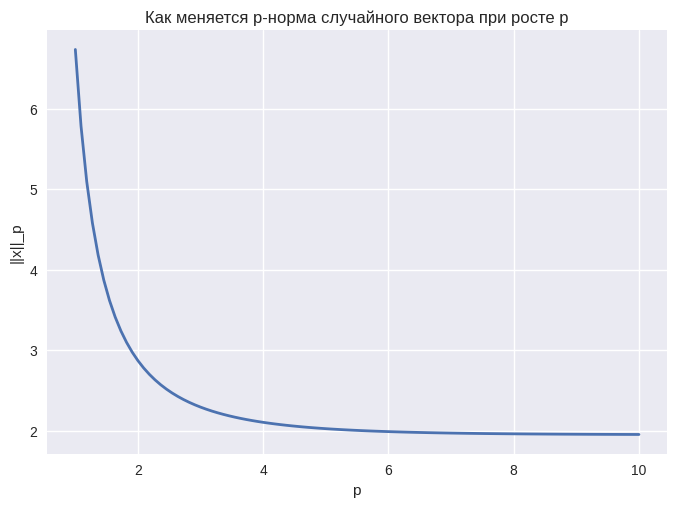

In [14]:
# Визуализация зависимости p-нормы от p (на сетке p)
ps = np.linspace(1, 10, 100)
pn = [p_norm(x, p) for p in ps]

plt.figure()
plt.plot(ps, pn, linewidth=2)
plt.xlabel("p")
plt.ylabel("||x||_p")
plt.title("Как меняется p-норма случайного вектора при росте p")
plt.grid(True)
plt.show()

In [15]:
A = rng.normal(size=(4,5))

print("random matrix: \n", A)

random matrix: 
 [[-0.01680116 -0.85304393  0.87939797  0.77779194  0.0660307 ]
 [ 1.12724121  0.46750934 -0.85929246  0.36875078 -0.9588826 ]
 [ 0.8784503  -0.04992591 -0.18486236 -0.68092954  1.22254134]
 [-0.15452948 -0.42832782 -0.35213355  0.53230919  0.36544406]]


In [16]:
def all_norms(A):
    return {
        "||A||_sum": mat_norm_1(A),
        "||A||_∞": mat_norm_inf(A),
        "||A||_F": mat_norm_fro(A),
        "||A||_2": mat_norm_2(A)
    }

all_norms(A)

{'||A||_sum': np.float64(2.6128987014283234),
 '||A||_∞': np.float64(3.7816763970148144),
 '||A||_F': np.float64(2.984717768323568),
 '||A||_2': np.float64(1.9689608843672568)}

## Пример 1: «Близость» потребителей и выбор нормы

In [17]:
categories = ["Food","Transport","Services","Leisure"]
data = {
    "C1": [300, 120,  80, 150],
    "C2": [250,  90, 120, 110],
    "C3": [320, 110,  60, 130],
    "C4": [200, 150, 140,  80],
    "C5": [280, 100,  90, 160],
}


df = pd.DataFrame(data, index=categories)
display(df)

,C1,C2,C3,C4,C5
Food,300,250,320,200,280
Transport,120,90,110,150,100
Services,80,120,60,140,90
Leisure,150,110,130,80,160


In [18]:
r = np.array([400, 120, 80, 150])  # референс 1

In [19]:
def dist(v):
    return {
        "L1": p_norm(v - r, 1),
        "L2": p_norm(v - r, 2),
        "L∞": p_norm(v - r, np.inf)
    }

In [20]:
rows = []
for col in df.columns:
    v = df[col].values.astype(float)
    d = dist(v)
    rows.append({"Consumer": col, **d})

out = pd.DataFrame(rows).set_index("Consumer")
out_sorted_by_L2 = out.sort_values("L2")
display("Consumer distances by norms", out_sorted_by_L2.round(3))

'Consumer distances by norms'

,L1,L2,L∞
Consumer,,,
C3,130.0,85.440,80.0
C1,100.0,100.000,100.0
C5,160.0,122.474,120.0
C2,260.0,163.095,150.0
C4,360.0,222.261,200.0



Выбор нормы — это **модельные допущения**: $\ell_1$ подчёркивает «общую разницу» по всем позициям, $\ell_\infty$ — «наибольшее отклонение», $\ell_2$ — компромисс.

## Пример 2: Сравнение стран на основе реальных данных World Bank data

Всемирный Банк (World Bank) - https://data.worldbank.org/

Выгружать показатели разных стран можно по ссылке вида: https://api.worldbank.org/v2/country/{country_iso3}/indicator/{indicator_code}

Например, достать ВВП России можно по ссылке: https://api.worldbank.org/v2/country/RUS/indicator/NY.GDP.PCAP.CD


---
    "NY.GDP.MKTP.CD": "GDP (current US$) - ВВП в долларах США",
    "NY.GDP.MKTP.KD.ZG": "GDP growth (annual %) - Рост ВВП (%)",
    "NY.GDP.PCAP.CD": "GDP per capita (current US$) - ВВП на душу населения",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %) - Инфляция (%)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) - Безработица (%)",
    "NE.EXP.GNFS.CD": "Exports of goods and services (current US$) - Экспорт товаров и услуг",
    "NE.IMP.GNFS.CD": "Imports of goods and services (current US$) - Импорт товаров и услуг",
    "FR.INR.RINR": "Real interest rate (%) - Реальная процентная ставка",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP) - Госдолг (% ВВП)"

    "USA": "United States (США)",
    "CHN": "China (Китай)",
    "RUS": "Russian Federation (Россия)",
    "IND": "India (Индия)",
    "BRA": "Brazil (Бразилия)",
    "DEU": "Germany (Германия)",
    "ZAF": "South Africa (Южная Африка)",
    "JPN": "Japan (Япония)",
    "GBR": "United Kingdom (Великобритания)",
    "CAN": "Canada (Канада)"

In [21]:
countries = ["USA", "CHN", "RUS", "IND", "BRA", "DEU", "ZAF", "JPN", "GBR", "CAN"]

# Индикаторы (World Bank codes)
indicators = {
    "GDP_pc": "NY.GDP.PCAP.CD",     # GDP per capita (current US$) https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
    "Inflation": "FP.CPI.TOTL.ZG",  # Inflation, consumer prices (annual %)
    "Unemployment": "SL.UEM.TOTL.ZS" # Unemployment, total (% of total labor force)
}

# Годовой диапазон для поиска последних доступных значений
start_year = 2015
end_year = 2024

In [22]:
# --- Вспомогательная функция: получить последнее ненулевое значение индикатора для страны ---
def fetch_latest_for_country_indicator(country_iso3, indicator_code, start=start_year, end=end_year):
    url = f"https://api.worldbank.org/v2/country/{country_iso3}/indicator/{indicator_code}"
    params = {"format":"json", "date":f"{start}:{end}", "per_page":100}
    r = requests.get(url, params=params)
    if r.status_code != 200:
        return None
    data = r.json()
    if not isinstance(data, list) or len(data) < 2:
        return None
    records = data[1]  # список словарей с годами
    # Идём от самого нового года к старому и ищем первый ненулевой value
    records_sorted = sorted(records, key=lambda rec: int(rec.get("date", 0)), reverse=True)
    for rec in records_sorted:
        val = rec.get("value", None)
        if val is not None:
            return val, int(rec.get("date"))
    return (None, None)

# --- Собираем таблицу: страны x индикаторы с последними значениями и годом ---
rows = []
for c in countries:
    row = {"iso3": c}
    for name, code in indicators.items():
        val, year = fetch_latest_for_country_indicator(c, code)
        row[name] = val
        row[name + "_year"] = year
    rows.append(row)

df = pd.DataFrame(rows).set_index("iso3")
print("Сырые данные (последние доступные значения в диапазоне", start_year, "-", end_year, "):")
display(df)

Сырые данные (последние доступные значения в диапазоне 2015 - 2024 ):


,GDP_pc,GDP_pc_year,Inflation,Inflation_year,Unemployment,Unemployment_year
iso3,,,,,,
USA,85809.900385,2024,2.949525,2024,4.106,2024
CHN,13303.148154,2024,0.218129,2024,4.571,2024
RUS,14889.018555,2024,6.694459,2021,2.527,2024
IND,2696.663900,2024,4.953036,2024,4.202,2024
BRA,10280.314862,2024,4.367464,2024,7.634,2024
DEU,55800.219455,2024,2.256498,2024,3.406,2024
ZAF,6253.371582,2024,4.361152,2024,33.168,2024
JPN,32475.892499,2024,2.738537,2024,2.563,2024
GBR,52636.786594,2024,3.271573,2024,4.111,2024


In [23]:
# --- Проверим пропуски ---
print("\nЧисло пропусков по индикаторам:")
print(df[[k for k in indicators.keys()]].isna().sum())


Число пропусков по индикаторам:
GDP_pc          0
Inflation       0
Unemployment    0
dtype: int64


In [24]:
# --- Обработка: логарифмируем GDP per capita (чтобы привести масштаб к распределению), затем стандартизируем (z-score) ---
proc = df[[k for k in indicators.keys()]].copy()
proc

,GDP_pc,Inflation,Unemployment
iso3,,,
USA,85809.900385,2.949525,4.106
CHN,13303.148154,0.218129,4.571
RUS,14889.018555,6.694459,2.527
IND,2696.663900,4.953036,4.202
BRA,10280.314862,4.367464,7.634
DEU,55800.219455,2.256498,3.406
ZAF,6253.371582,4.361152,33.168
JPN,32475.892499,2.738537,2.563
GBR,52636.786594,3.271573,4.111


In [25]:
# осторожно: лог от отрицательных/нуль невозможен — если есть нули/NaN, оставим NaN
proc["GDP_pc_log"] = np.log(proc["GDP_pc"])
proc = proc.drop(columns=["GDP_pc"])
proc = proc.rename(columns={"GDP_pc_log":"GDP_pc_log"})
proc

,Inflation,Unemployment,GDP_pc_log
iso3,,,
USA,2.949525,4.106,11.359890
CHN,0.218129,4.571,9.495756
RUS,6.694459,2.527,9.608379
IND,4.953036,4.202,7.899771
BRA,4.367464,7.634,9.237986
DEU,2.256498,3.406,10.929533
ZAF,4.361152,33.168,8.740876
JPN,2.738537,2.563,10.388253
GBR,3.271573,4.111,10.871171


In [26]:
# Стандартизация (z-score) по столбцам, игнорируем NaN
proc_z = proc.apply(lambda col: (col - col.mean())/col.std(ddof=0))

print("\nСтандартизованные признаки (z-score):")
display(proc_z.round(3))


Стандартизованные признаки (z-score):


,Inflation,Unemployment,GDP_pc_log
iso3,,,
USA,-0.279,-0.362,1.327
CHN,-1.905,-0.308,-0.419
RUS,1.949,-0.542,-0.314
IND,0.913,-0.351,-1.915
BRA,0.564,0.041,-0.661
DEU,-0.692,-0.441,0.924
ZAF,0.560,2.955,-1.127
JPN,-0.405,-0.538,0.417
GBR,-0.088,-0.361,0.869


In [27]:
# --- Выберем референсную страну, от которой считаем расстояния ---
ref_country = "DEU"  # Германия как "референс"
if ref_country not in proc_z.index:
    ref_country = proc_z.dropna().index[0]

ref = proc_z.loc[ref_country].values
ref

array([-0.69179367, -0.44141323,  0.92407973])

In [28]:
# --- Функции норм ---
def l1(u): return np.sum(np.abs(u))
def l2(u): return math.sqrt(np.sum(u**2))
def linf(u): return np.max(np.abs(u))

In [29]:
# --- Вычислим расстояния (ref <- other) и ранжирование ---
distances = []
for idx, row in proc_z.iterrows():
    if row.isna().any():
        distances.append({"iso3": idx, "L1": np.nan, "L2": np.nan, "Linf": np.nan})
        continue
    vec = row.values - ref
    distances.append({"iso3": idx, "L1": l1(vec), "L2": l2(vec), "Linf": linf(vec)})

dist_df = pd.DataFrame(distances).set_index("iso3")
dist_df_sorted = dist_df.sort_values("L2")  # сортируем по L2 для примера

print(f"\nРеференс: {ref_country}. Расстояния до референса (стандартизованные признаки):")
display(dist_df.round(4))


Референс: DEU. Расстояния до референса (стандартизованные признаки):


,L1,L2,Linf
iso3,,,
USA,0.8955,0.5823,0.4123
CHN,2.6893,1.8148,1.3435
RUS,3.9788,2.9181,2.6405
IND,4.5342,3.2622,2.8390
BRA,3.3236,2.0791,1.5850
DEU,0.0000,0.0000,0.0000
ZAF,6.6997,4.1606,3.3966
JPN,0.8902,0.5906,0.5072
GBR,0.7391,0.6117,0.6040


In [30]:
# --- Таблица ранжирования: для каждой нормы — ранжирование стран по близости ---
rankings = pd.DataFrame({
    "rank_L1": dist_df["L1"].rank(method="min").astype('Int64'),
    "rank_L2": dist_df["L2"].rank(method="min").astype('Int64'),
    "rank_Linf": dist_df["Linf"].rank(method="min").astype('Int64')
})
print("\nРанжирование стран по нормам (1 — наиболее близкая):")
display(rankings.sort_values("rank_L2"))


Ранжирование стран по нормам (1 — наиболее близкая):


,rank_L1,rank_L2,rank_Linf
iso3,,,
DEU,1,1,1
CAN,2,2,2
USA,5,3,3
JPN,4,4,4
GBR,3,5,5
CHN,6,6,6
BRA,7,7,7
RUS,8,8,8
IND,9,9,9


ℓ1 подчёркивает суммарное отклонение по всем признакам, ℓ2 даёт компромисс, ℓ∞ отражает максимальное по-координате отклонение.

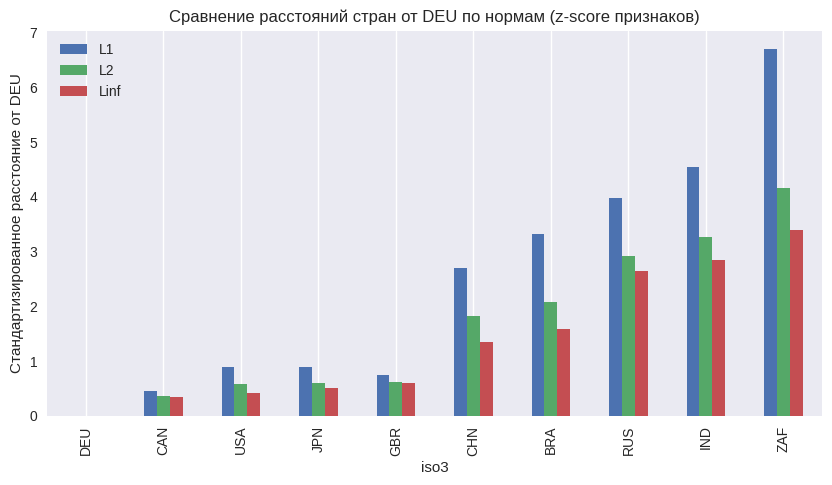

In [31]:
# --- Визуализация: барплот расстояний по нормам ---
plot_df = dist_df.sort_values("L2").dropna()
plot_df.plot(kind="bar", figsize=(10,5))
plt.ylabel("Стандартизированное расстояние от " + ref_country)
plt.title("Сравнение расстояний стран от " + ref_country + " по нормам (z-score признаков)")
plt.grid(axis='y')
plt.show()


## Пример 3: Анализ ВВП стран за несколько лет с помощью скелетного разложения

Представьте, что вас попросили проанализировать экономики 50 стран. У вас есть 200 показателей по каждой (ВВП, инфляция, экспорт нефти, импорт кофе, и т.д.). Матрица получается огромная: 50 строк x 200 столбцов.

Вопрос: Можно ли понять общую картину, не изучая все 50 стран и все 200 показателей?

Ответ: Да, надо взять самые важные страны (например, США, Китай, Германия) и самые важные показатели (например, ВВП, объем промышленного производства). Изучив только их, мы поймем примерно общую картину, что происходит.

Новый вопрос: А как математически определить, какие страны и какие показатели являются "самыми важными" и потом проверить, насколько хорошо мы выбрали "самые важные"? -- Тут поможет CUR.

In [32]:
COUNTRIES = ["USA", "CHN", "DEU", "JPN", "GBR", "FRA", "IND", "BRA", "CAN", "RUS"]
YEARS = ["2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"]
INDICATOR = "NY.GDP.MKTP.CD"  # GDP (current US$)

# --- Функция для получения данных ВВП по стране и году ---
def fetch_gdp_data(country_iso3: str, year: str) -> float:
    """
    Получает данные ВВП для конкретной страны и года
    """
    url = f"https://api.worldbank.org/v2/country/{country_iso3}/indicator/{INDICATOR}"
    params = {"format": "json", "date": year, "per_page": 1}

    try:
        r = requests.get(url, params=params, timeout=10)
        if r.status_code != 200:
            return np.nan

        data = r.json()
        if not isinstance(data, list) or len(data) < 2 or not data[1]:
            return np.nan

        value = data[1][0].get("value", None)
        return float(value) if value is not None else np.nan

    except Exception as e:
        print(f"Ошибка при запросе для {country_iso3}, {year}: {e}")
        return np.nan

In [33]:
# --- Создаем матрицу ВВП (страны × годы) ---

gdp_data = {}
total_requests = len(COUNTRIES) * len(YEARS)
current_request = 0

for country in COUNTRIES:
    print(f"Загружаем данные для {country}...")
    country_gdp = []

    for year in YEARS:
        current_request += 1
        gdp = fetch_gdp_data(country, year)
        country_gdp.append(gdp)

    gdp_data[country] = country_gdp

Загружаем данные для USA...
Загружаем данные для CHN...
Загружаем данные для DEU...
Загружаем данные для JPN...
Загружаем данные для GBR...
Загружаем данные для FRA...
Загружаем данные для IND...
Загружаем данные для BRA...
Загружаем данные для CAN...
Загружаем данные для RUS...


In [34]:
# Создаем DataFrame
df = pd.DataFrame(gdp_data, index=YEARS).T

# Преобразуем в триллионы долларов для удобства
df = df / 1e12

print("\nМатрица ВВП (триллионы $):")
display(df.round(4))


Матрица ВВП (триллионы $):


,2016,2017,2018,2019,2020,2021,2022,2023,2024
USA,18.8049,19.6121,20.6565,21.5400,21.3541,23.6812,26.0069,27.7207,29.1849
CHN,11.4560,12.5376,14.1478,14.5602,14.9964,18.2017,18.3168,18.2704,18.7438
DEU,3.5378,3.7631,4.0520,3.9572,3.9401,4.3483,4.1636,4.5257,4.6599
JPN,5.0037,4.9308,5.0409,5.1180,5.0541,5.0391,4.2625,4.2132,4.0262
GBR,2.6891,2.6801,2.8713,2.8514,2.6968,3.1433,3.1140,3.3699,3.6438
FRA,2.4704,2.5889,2.7816,2.7228,2.6479,2.9664,2.7963,3.0518,3.1621
IND,2.2948,2.6515,2.7029,2.8356,2.6749,3.1673,3.3461,3.6385,3.9127
BRA,1.7957,2.0635,1.9169,1.8733,1.4761,1.6706,1.9519,2.1911,2.1794
CAN,1.5280,1.6493,1.7253,1.7437,1.6557,2.0224,2.1904,2.1733,2.2413
RUS,1.2768,1.5742,1.6573,1.6931,1.4931,1.8292,2.2916,2.0715,2.1738



Итоговая матрица: (10, 9) (стран: 10, лет: 9)


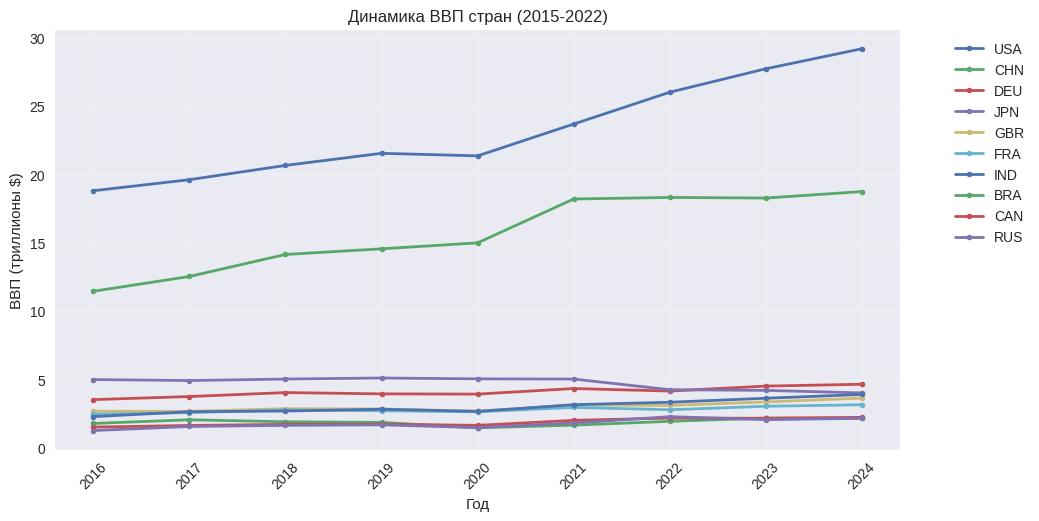

In [35]:
A = df.values.astype(float)
countries = df.index.tolist()
years = df.columns.tolist()

print(f"\nИтоговая матрица: {A.shape} (стран: {A.shape[0]}, лет: {A.shape[1]})")

plt.figure(figsize=(24, 12))
plt.subplot(2, 2, 1)
for i, country in enumerate(countries):
    plt.plot(years, A[i], 'o-', label=country, linewidth=2, markersize=4)
plt.xlabel('Год')
plt.ylabel('ВВП (триллионы $)')
plt.title('Динамика ВВП стран (2015-2022)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

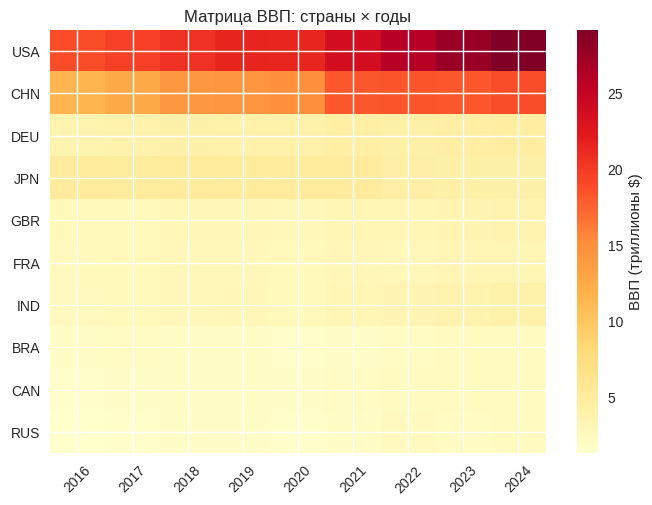

In [36]:
plt.subplot(1, 1, 1)
im = plt.imshow(A, cmap='YlOrRd', aspect='auto')
plt.colorbar(im, label='ВВП (триллионы $)')
plt.yticks(range(len(countries)), countries)
plt.xticks(range(len(years)), years, rotation=45)
plt.title('Матрица ВВП: страны × годы')
plt.show()

In [37]:
# --- CUR-разложение ---

def cur_decomposition(A, k, method='deterministic'):
    """
    CUR-разложение с выбором k самых важных строк и столбцов
    """
    # Выбор столбцов (лет)
    col_norms = np.linalg.norm(A, axis=0, ord=2)
    # Выбор строк (стран)
    row_norms = np.linalg.norm(A, axis=1, ord=2)

    if method == 'probabilistic':
        col_probs = col_norms**2 / np.sum(col_norms**2)
        row_probs = row_norms**2 / np.sum(row_norms**2)

        selected_col_indices = np.random.choice(len(col_probs), size=k, replace=False, p=col_probs)
        selected_row_indices = np.random.choice(len(row_probs), size=k, replace=False, p=row_probs)
    else:
        # Детерминированный выбор - k самых важных
        selected_col_indices = np.argsort(col_norms)[-k:]
        selected_row_indices = np.argsort(row_norms)[-k:]

    # Строим матрицы C, U, R
    C = A[:, selected_col_indices]  # Все страны × ключевые годы
    R = A[selected_row_indices, :]  # Ключевые страны × все годы
    W = A[np.ix_(selected_row_indices, selected_col_indices)]  # Пересечение

    U = np.linalg.pinv(W)  # Псевдообратная матрица
    A_cur = C @ U @ R      # Восстановленная матрица

    error = np.linalg.norm(A - A_cur, ord='fro') # Оцениваем, насколько CUR близко к A

    return {
        'cols': selected_col_indices,
        'rows': selected_row_indices,
        'error': error,
        'A_cur': A_cur
    }

Применяем CUR-разложение:

In [38]:
k = 3 # пока просто угадаем ранг
print(f"\n=== CUR-РАЗЛОЖЕНИЕ (k={k}) ===")

result = cur_decomposition(A, k)
selected_cols = result['cols']
selected_rows = result['rows']

print(f"Выбранные {k} ключевых года: {[years[i] for i in selected_cols]}")
print(f"Выбранные {k} ключевых страны: {[countries[i] for i in selected_rows]}")
print(f"Ошибка аппроксимации: {result['error']:.6f}")


=== CUR-РАЗЛОЖЕНИЕ (k=3) ===
Выбранные 3 ключевых года: ['2022', '2023', '2024']
Выбранные 3 ключевых страны: ['JPN', 'CHN', 'USA']
Ошибка аппроксимации: 3.970609


In [39]:
print("=== ИСХОДНАЯ МАТРИЦА ВВП ===")
df_original = pd.DataFrame(A, index=countries, columns=years)
display(df_original.round(4))


print("\n=== ВОССТАНОВЛЕННАЯ МАТРИЦА CUR (с выбранным нами и возможно не оптимальным k) ===")
df_cur = pd.DataFrame(result['A_cur'], index=countries, columns=years)
display(df_cur.round(4))

=== ИСХОДНАЯ МАТРИЦА ВВП ===


,2016,2017,2018,2019,2020,2021,2022,2023,2024
USA,18.8049,19.6121,20.6565,21.5400,21.3541,23.6812,26.0069,27.7207,29.1849
CHN,11.4560,12.5376,14.1478,14.5602,14.9964,18.2017,18.3168,18.2704,18.7438
DEU,3.5378,3.7631,4.0520,3.9572,3.9401,4.3483,4.1636,4.5257,4.6599
JPN,5.0037,4.9308,5.0409,5.1180,5.0541,5.0391,4.2625,4.2132,4.0262
GBR,2.6891,2.6801,2.8713,2.8514,2.6968,3.1433,3.1140,3.3699,3.6438
FRA,2.4704,2.5889,2.7816,2.7228,2.6479,2.9664,2.7963,3.0518,3.1621
IND,2.2948,2.6515,2.7029,2.8356,2.6749,3.1673,3.3461,3.6385,3.9127
BRA,1.7957,2.0635,1.9169,1.8733,1.4761,1.6706,1.9519,2.1911,2.1794
CAN,1.5280,1.6493,1.7253,1.7437,1.6557,2.0224,2.1904,2.1733,2.2413
RUS,1.2768,1.5742,1.6573,1.6931,1.4931,1.8292,2.2916,2.0715,2.1738



=== ВОССТАНОВЛЕННАЯ МАТРИЦА CUR (с выбранным нами и возможно не оптимальным k) ===


,2016,2017,2018,2019,2020,2021,2022,2023,2024
USA,18.8049,19.6121,20.6565,21.5400,21.3541,23.6812,26.0069,27.7207,29.1849
CHN,11.4560,12.5376,14.1478,14.5602,14.9964,18.2017,18.3168,18.2704,18.7438
DEU,4.3255,4.2496,4.2106,4.3606,4.2002,4.0609,4.1636,4.5257,4.6599
JPN,5.0037,4.9308,5.0409,5.1180,5.0541,5.0391,4.2625,4.2132,4.0262
GBR,1.6733,1.8418,2.0108,2.1284,2.1330,2.5683,3.1140,3.3699,3.6438
FRA,2.7978,2.7595,2.7399,2.8434,2.7396,2.6729,2.7963,3.0518,3.1621
IND,2.0621,2.2019,2.3422,2.4703,2.4490,2.8141,3.3461,3.6385,3.9127
BRA,3.0289,2.8366,2.6600,2.7372,2.5617,2.1046,1.9519,2.1911,2.1794
CAN,1.2132,1.3672,1.5849,1.6330,1.7011,2.1463,2.1904,2.1733,2.2413
RUS,-0.0557,0.3356,0.8308,0.8526,1.0946,2.1634,2.2916,2.0715,2.1738


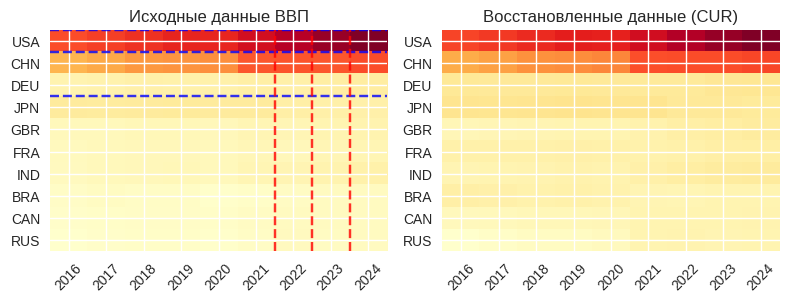

In [40]:
# --- Визуализация результатов CUR ---
plt.subplot(2, 2, 3)
plt.imshow(A, cmap='YlOrRd', aspect='auto')
plt.title('Исходные данные ВВП')
plt.yticks(range(len(countries)), countries)
plt.xticks(range(len(years)), years, rotation=45)

# Подсвечиваем выбранные строки и столбцы
for row_idx in selected_rows:
    plt.axhline(y=row_idx-0.5, color='blue', linestyle='--', alpha=0.8)
for col_idx in selected_cols:
    plt.axvline(x=col_idx-0.5, color='red', linestyle='--', alpha=0.8)

plt.subplot(2, 2, 4)
plt.imshow(result['A_cur'], cmap='YlOrRd', aspect='auto')
plt.title('Восстановленные данные (CUR)')
plt.yticks(range(len(countries)), countries)
plt.xticks(range(len(years)), years, rotation=45)

plt.tight_layout()
plt.show()

То есть мы выбрали k строк и столбцов, построили CUR  разложение, а потом сравниваем результат перемножения с исходной матрицей и смотрим насколько правильно мы выбрали k показателей, судя по норме.

**Вопрос:** А почему бы сразу просто не посчитать ранг исходной матрицы? Вместо угадывания k.

**Ответ:** на практике понятие ранга почти бесполезно:

1. ***Ранг исходной матрицы на реальных данных почти всегда максимален***
В нашем примере матрица A размером 10x9. Её максимально возможный ранг — min(10,9) = 9.

Почему так происходит?

Данные зашумлены. Даже если в идеальной математической модели ранг матрицы должен быть маленьким, на практике из-за ошибок измерений, случайных колебаний и прочего шума никакие строки/столбцы точно не будут линейно зависимыми.

Результат: rank(A) = 9. Матрица полного ранга.

Что это значит? С точки зрения линейной алгебры, чтобы точно описать нашу систему, нам нужны все 9 товаров и еще 9 стран (из 10). Это тривиальный и бесполезный вывод. Он не дает никакого сокращения сложности.

2. ***Идея "эффективного ранга"*** (Effective Rank)
Мы понимаем, что хотя матрица формально имеет ранг 9, большая часть её "информации" сосредоточена в нескольких главных компонентах. Шум и мелкие детали дают остальной ранг.

Задача CUR (и SVD) — не найти точный ранг, а найти эффективный ранг k, при котором аппроксимация A ≈ C U R (где C и R имеют по k столбцов/строк) "достаточно хороша".

3. ***Как выбрать k?***
Выбор k — это по сути поиск компромисса между точностью и простотой. На практике используют метод локтя (Elbow Method) на основе норм ошибок.


=== АНАЛИЗ ОПТИМАЛЬНОГО k ===
k = 1: ошибка = 6.948531
k = 2: ошибка = 5.118940
k = 3: ошибка = 3.970609
k = 4: ошибка = 5.828422
k = 5: ошибка = 1.037279
k = 6: ошибка = 2.249291
k = 7: ошибка = 2.478513
k = 8: ошибка = 0.696791
k = 9: ошибка = 0.000000


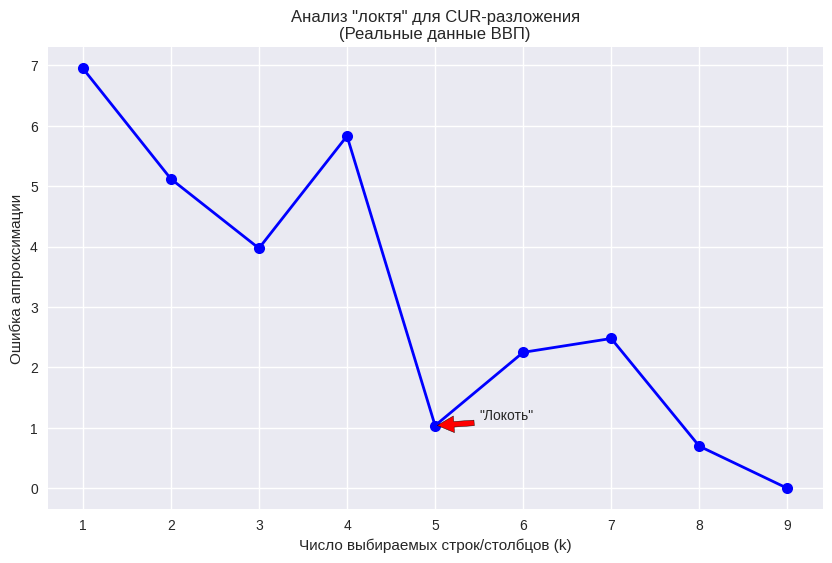

In [41]:
# --- Анализ "локтя" для выбора оптимального k ---
print("\n=== АНАЛИЗ ОПТИМАЛЬНОГО k ===")
max_rank = min(A.shape)
k_values = range(1, max_rank + 1)
errors = []

for k in k_values:
    result_k = cur_decomposition(A, k)
    errors.append(result_k['error'])
    print(f"k = {k}: ошибка = {result_k['error']:.6f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Число выбираемых строк/столбцов (k)')
plt.ylabel('Ошибка аппроксимации')
plt.title('Анализ "локтя" для CUR-разложения\n(Реальные данные ВВП)')
plt.grid(True)

# Автоматическое определение "локтя"
for i in range(1, len(errors)-1):
    if errors[i] < errors[i-1] * 0.7:  # Резкое уменьшение ошибки
        plt.annotate('"Локоть"', xy=(k_values[i], errors[i]),
                    xytext=(k_values[i]+0.5, errors[i]+0.1),
                    arrowprops=dict(facecolor='red', shrink=0.05))
        break

plt.show()

In [42]:
k = 5
print(f"\n=== CUR-РАЗЛОЖЕНИЕ (k={k}) ===")

result = cur_decomposition(A, k)
selected_cols = result['cols']
selected_rows = result['rows']

print(f"Выбранные {k} ключевых года: {[years[i] for i in selected_cols]}")
print(f"Выбранные {k} ключевых страны: {[countries[i] for i in selected_rows]}")
print(f"Ошибка аппроксимации: {result['error']:.6f}")

print("=== ИСХОДНАЯ МАТРИЦА ВВП ===")
df_original = pd.DataFrame(A, index=countries, columns=years)
display(df_original.round(4))

print("\n=== ВОССТАНОВЛЕННАЯ МАТРИЦА CUR (с оптимальным k) ===")
df_cur = pd.DataFrame(result['A_cur'], index=countries, columns=years)
display(df_cur.round(4))


=== CUR-РАЗЛОЖЕНИЕ (k=5) ===
Выбранные 5 ключевых года: ['2019', '2021', '2022', '2023', '2024']
Выбранные 5 ключевых страны: ['IND', 'DEU', 'JPN', 'CHN', 'USA']
Ошибка аппроксимации: 1.037279
=== ИСХОДНАЯ МАТРИЦА ВВП ===


,2016,2017,2018,2019,2020,2021,2022,2023,2024
USA,18.8049,19.6121,20.6565,21.5400,21.3541,23.6812,26.0069,27.7207,29.1849
CHN,11.4560,12.5376,14.1478,14.5602,14.9964,18.2017,18.3168,18.2704,18.7438
DEU,3.5378,3.7631,4.0520,3.9572,3.9401,4.3483,4.1636,4.5257,4.6599
JPN,5.0037,4.9308,5.0409,5.1180,5.0541,5.0391,4.2625,4.2132,4.0262
GBR,2.6891,2.6801,2.8713,2.8514,2.6968,3.1433,3.1140,3.3699,3.6438
FRA,2.4704,2.5889,2.7816,2.7228,2.6479,2.9664,2.7963,3.0518,3.1621
IND,2.2948,2.6515,2.7029,2.8356,2.6749,3.1673,3.3461,3.6385,3.9127
BRA,1.7957,2.0635,1.9169,1.8733,1.4761,1.6706,1.9519,2.1911,2.1794
CAN,1.5280,1.6493,1.7253,1.7437,1.6557,2.0224,2.1904,2.1733,2.2413
RUS,1.2768,1.5742,1.6573,1.6931,1.4931,1.8292,2.2916,2.0715,2.1738



=== ВОССТАНОВЛЕННАЯ МАТРИЦА CUR (с оптимальным k) ===


,2016,2017,2018,2019,2020,2021,2022,2023,2024
USA,18.8049,19.6121,20.6565,21.5400,21.3541,23.6812,26.0069,27.7207,29.1849
CHN,11.4560,12.5376,14.1478,14.5602,14.9964,18.2017,18.3168,18.2704,18.7438
DEU,3.5378,3.7631,4.0520,3.9572,3.9401,4.3483,4.1636,4.5257,4.6599
JPN,5.0037,4.9308,5.0409,5.1180,5.0541,5.0391,4.2625,4.2132,4.0262
GBR,2.2310,2.7296,2.6808,2.8514,2.5819,3.1433,3.1140,3.3699,3.6438
FRA,2.3996,2.6171,2.7660,2.7228,2.6586,2.9664,2.7963,3.0518,3.1621
IND,2.2948,2.6515,2.7029,2.8356,2.6749,3.1673,3.3461,3.6385,3.9127
BRA,2.1642,1.7793,1.9489,1.8733,2.0212,1.6706,1.9519,2.1911,2.1794
CAN,1.4647,1.5001,1.6125,1.7437,1.7732,2.0224,2.1904,2.1733,2.2413
RUS,1.3783,1.3532,1.2549,1.6931,1.6323,1.8292,2.2916,2.0715,2.1738


In [43]:
result['error'], result['error']/np.linalg.norm(A, 'fro')

(np.float64(1.0372785263139583), np.float64(0.011663512340594276))

In [44]:
print("\n=== ЭКОНОМИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ ===")
print("Мы выбрали:")
print(f"- Ключевые годы: {[years[i] for i in selected_cols]} - наиболее информативные для описания динамики")
print(f"- Ключевые страны: {[countries[i] for i in selected_rows]} - наиболее репрезентативные экономики")
print(f"- Точность восстановления: {100*(1 - result['error']/np.linalg.norm(A, 'fro')):.1f}%")


=== ЭКОНОМИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ ===
Мы выбрали:
- Ключевые годы: ['2019', '2021', '2022', '2023', '2024'] - наиболее информативные для описания динамики
- Ключевые страны: ['IND', 'DEU', 'JPN', 'CHN', 'USA'] - наиболее репрезентативные экономики
- Точность восстановления: 98.8%
